# Binomial vs Bernoulli

In the lecture, we saw that the binomial distribution is equivalent to the sum of the results obtained from repeated sampling from a Bernoulli distribution. We also saw that if $X$ is a random variable from a Bernoulli distribution with mean/probability of success $p$ and $Y$ is a random variable from a binomial distribution, which is the sum of $n$ repeated samples from the $X$ distribution, then the mean and variance of the $Y$ distribution can be calculated as follows:

$$
E[Y] = np
$$
$$
Var(Y) = np(1-p)
$$

In this section, we intend to practically verify these relationships. First, we will write a function to sample from the binomial distribution using the Bernoulli distribution. Then, for various values of $p$ as the mean of the Bernoulli distribution used, we will draw many samples from the binomial distribution and calculate the mean and variance.

By comparing the mean and variance graphs for different values of $p$ with the given relations for the mean and variance of the binomial distribution, we will demonstrate the validity of these relationships.


First, we implement the binomial sampling function based on the Bernoulli distribution. Suppose we want to generate $m$ samples from the binomial distribution corresponding to $n$ repetitions of a Bernoulli distribution.

To do this, we need to take $m$ groups of $n$ samples from the Bernoulli distribution, sum the samples of each group, and return the sum as the output value.

To create these groups and avoid using a `for` loop, we will initially take $n \times m$ samples from the Bernoulli distribution, reshape them into an $m \times n$ matrix, and compute the sum of each row.

In [ ]:
install.packages("statip")
library(statip)
# `rbern(n, p)` function, defined in "statip" library, returns `n` sample of bernuli distribution with `p=p`.
rbern(10, .3)

In [ ]:
# `rbinomial(m, n, p)` function is going to return `m` sample of binomial
# distribution which presents `n` sample of bernoli distribution with `p=p`.
rbinomial <- function(m, n, p) {
  data <- matrix(rbern(m*n, p))
  # Next line is reshaping `data` with m*n length to (m, n).
  dim(data) <- c(m, n)
  # After that we will sum up each row.
  data <- rowSums(data)
  return (data)
}

rbinomial(5, 10, .3)

[1] 2 2 5 2 1

Now, for a fixed value of $n = 500$, we will take 5000 samples from the binomial distribution for each value of $p$, and compute and plot the mean and variance.

In [ ]:
theoretical_mean = c()
theoretical_var = c()
observed_mean = c()
observed_var = c()

n = 500
samples_count = 5000
for (p100 in 0:100) {
  p = p100/100
  # We can use `c()` function to concatinate two lists.
  theoretical_mean = c(theoretical_mean, n*p)
  theoretical_var = c(theoretical_var, n*p*(1-p))
  samples = rbinomial(samples_count, n, p)
  # `mean()` function computes mean of a population.
  observed_mean = c(observed_mean, mean(samples))
  # `var()` function computes variance of a population.
  observed_var = c(observed_var, var(samples))
}

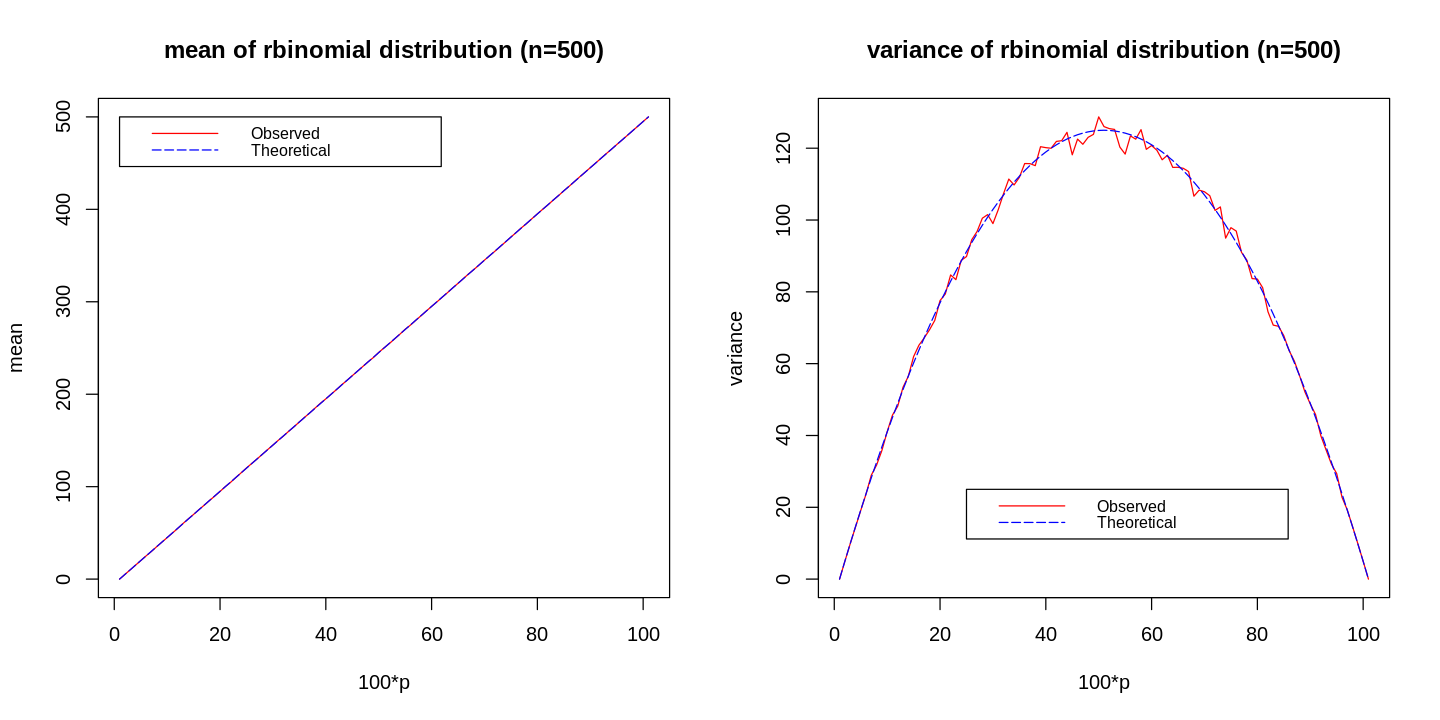

In [ ]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))

plot(observed_mean, xlab = "100*p", type = "l", ylab = "mean", lty=1,main = "mean of rbinomial distribution (n=500)", col = "red")
lines(theoretical_mean, col = 'blue', lty=5)
legend(1, 500, legend=c("Observed", "Theoretical"),col=c("red", "blue"), lty=c(1,5), cex=.8)

plot(observed_var, xlab = "100*p", type = "l", ylab = "variance",main = "variance of rbinomial distribution (n=500)", col = "red")
lines(theoretical_var, col = "blue", lty=5)
legend(25, 25, legend=c("Observed", "Theoretical"),col=c("red", "blue"), lty=c(1,5), cex=.8)

The R language, by default, provides the binomial distribution. At the end of this section, we will become familiar with two functions from this distribution:

In [ ]:
# `rbinom(m, n, p)` returns `m` samples of a binomial distribution with
# parameters `n`,`p`.
rbinom(5, 10, .3)

[1] 2 5 3 2 3

In [ ]:
# `dbinom(x, n, p)` returns probability of getting `x` as output of a binomial
# distribution with parameters `n`,`p`.
dbinom(3, 10, .3)

[1] 0.2668279

<div dir='rtl'>


</div>